# Projet sur la base de donnée du Titanic

# Importation des librairies nécessaires

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Importation des bases de données

In [2]:
train = pd.read_csv('train.csv', sep=',', encoding='utf-8')
test = pd.read_csv('test.csv', sep=',', encoding='utf-8')

# Vérification des bases de données

In [3]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
for col in train.columns:
    print('%s : %s, %s'%(col, len(train[col].unique()), len(train[train[col].isnull() == False]) / len(train) * 100))

PassengerId : 891, 100.0
Survived : 2, 100.0
Pclass : 3, 100.0
Name : 891, 100.0
Sex : 2, 100.0
Age : 89, 80.13468013468014
SibSp : 7, 100.0
Parch : 7, 100.0
Ticket : 681, 100.0
Fare : 248, 100.0
Cabin : 148, 22.895622895622896
Embarked : 4, 99.77553310886644


In [6]:
for col in test.columns:
    print('%s : %s, %s'%(col, len(test[col].unique()), len(test[test[col].isnull() == False]) / len(test) * 100))

PassengerId : 418, 100.0
Pclass : 3, 100.0
Name : 418, 100.0
Sex : 2, 100.0
Age : 80, 79.42583732057416
SibSp : 7, 100.0
Parch : 8, 100.0
Ticket : 363, 100.0
Fare : 170, 99.76076555023924
Cabin : 77, 21.770334928229666
Embarked : 3, 100.0


## Description des différentes variable :
#### PassengerId : Une colonne ajoutée par Kaggle pour identifier chaque ligne,
#### Pclass : La classe de ticket que le passager à acheter (1=1ère, 2=2nd, 3=3ème)
#### Name : Nom des passagers
#### Sex : Homme ou Femme
#### Age : Age du passager
#### SibSp : Le nombre de frères et sœurs ou de conjoints que le passager avait à bord du Titanic
#### Parch : Le nombre de parents ou d'enfants que le passager avait à bord du Titanic
#### Ticket : Le numéro de ticket du passager
#### Fare : Le prix payé par le passager
#### Cabin : Le numéro de cabine
#### Embarked : La porte d'embarquement (C=Cherbourg, Q=Queenstown, S=Southampton)

### On supprime un maximum de valeurs manquantes

In [7]:
del train['Cabin']
del test['Cabin']

In [8]:
test.dropna(subset=['Fare'], axis=0, inplace=True)

In [9]:
train.dropna(subset=['Embarked'], axis=0, inplace=True)

### Premières visualisations

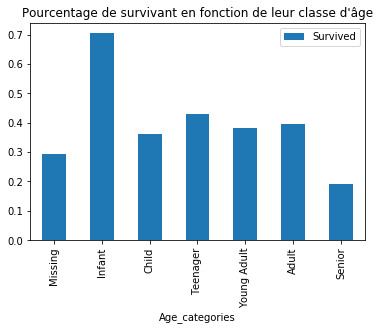

In [10]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar(title="Pourcentage de survivant en fonction de leur classe d'âge")
plt.show()

On peut observer qu'il y a un certain nombre de valeurs manquantes dans la variable Age. Il faut les remplacer par la moyenne ou la médiane.

In [11]:
print('%s, %s'%(train['Age'].mean(), np.median(train['Age'])))

23.640798650168726, 24.0


On va remplacer les valeurs manquantes par la médiane car le chiffre est rond et que la moyenne est suffisament proche.

In [12]:
train['Age'] = train['Age'].replace(-0.5, np.median(train['Age']))
test['Age'] = test['Age'].replace(-0.5, np.median(train['Age']))

#### Corrélation des valeurs numériques avec les survivants.

In [13]:
corr = train.corr()
print(np.abs(corr['Survived']).sort_values())

PassengerId    0.005028
SibSp          0.034040
Age            0.057833
Parch          0.083151
Fare           0.255290
Pclass         0.335549
Survived       1.000000
Name: Survived, dtype: float64


### Visualisation des différentes variables

,Survived
Sex,
female,0.740385
male,0.188908


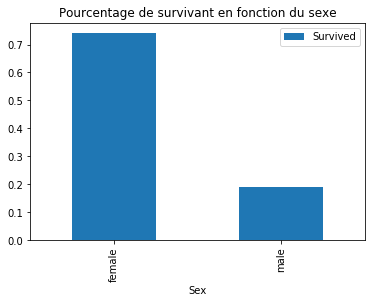

In [14]:
sex_plot = train.pivot_table(index="Sex",values="Survived")
sex_plot.plot.bar(title="Pourcentage de survivant en fonction du sexe")
sex_plot

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


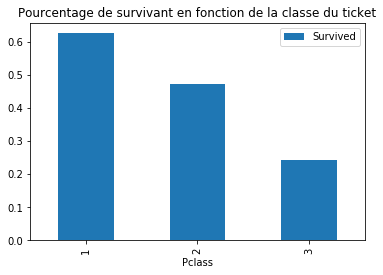

In [15]:
pclass_plot = train.pivot_table(index="Pclass",values="Survived")
pclass_plot.plot.bar(title="Pourcentage de survivant en fonction de la classe du ticket")
pclass_plot

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


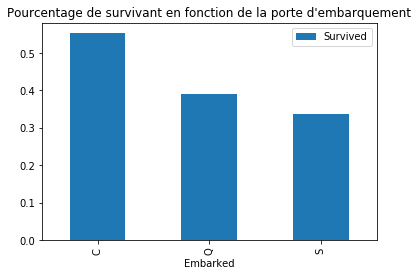

In [16]:
embarked_plot = train.pivot_table(index="Embarked",values="Survived")
embarked_plot.plot.bar(title="Pourcentage de survivant en fonction de la porte d'embarquement")
embarked_plot

,Survived
SibSp,
0,0.343234
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


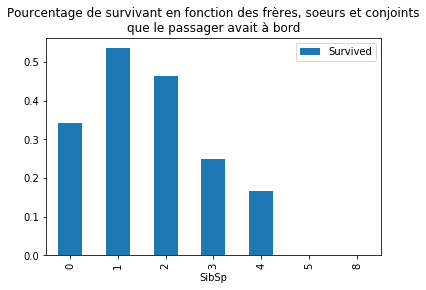

In [17]:
sibsp_plot = train.pivot_table(index="SibSp",values="Survived")
sibsp_plot.plot.bar(title='Pourcentage de survivant en fonction des frères, soeurs et conjoints\nque le passager avait à bord')
sibsp_plot

,Survived
Parch,
0,0.341716
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


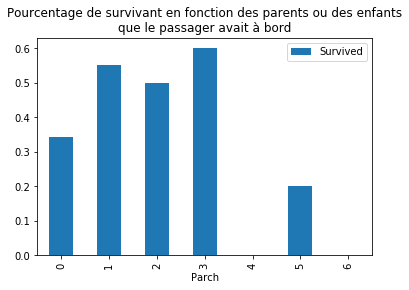

In [18]:
parch_plot = train.pivot_table(index="Parch",values="Survived")
parch_plot.plot.bar(title="Pourcentage de survivant en fonction des parents ou des enfants\nque le passager avait à bord")
parch_plot

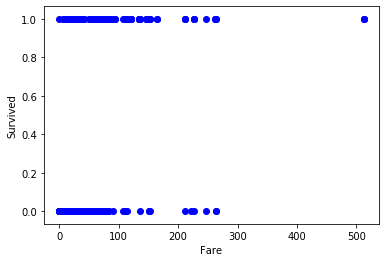

In [19]:
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.scatter(train['Fare'], train['Survived'], color='blue', label='')
plt.show()

#### Avec ce graphique, nous ne pouvons pas affirmer que le prix payer par les passagers influent sur la survie de ceux-ci.

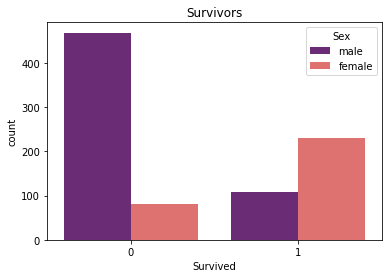

,Survived
Sex,
female,0.740385
male,0.188908


In [20]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'magma')
plt.title('Survivors')
plt.show()
sex_plot

#### On peut observer que les femmes ont beaucoup plus survécu que les hommes.

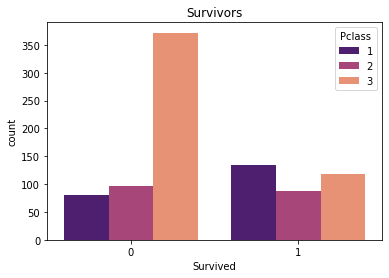

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [21]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'magma')
plt.title('Survivors')
plt.show()
pclass_plot

#### On peut observer qu'une grande partie des décets étaient les passagers ayant des tickets de 3ème classe.

### Première conclusion des différents graphiques : 
#### Nous pouvons observer sur ces différents graphiques que certaines variable influent plus que d'autres sur la survivabilité des passagers.
#### Par exemple : 
    - la classe du ticket a eu un impact sur la survie des passagers.
    - les femmes ont proportionnellement beaucoup plus survécu que les hommes (elles ont probablement été privilégiés)
    - on ne peut pas observer un quelconque impact du prix payer par les passagers sur leur survie.
    - l'âge a eu un impact sur la survie des passagers (les enfants ont probablement été privilégiés)

# Régression linéaire

#### A. En utilisant chaque variable individuellement.

En fonction de l'âge

In [36]:
X_train1 = train['Age'].to_numpy()
X_test1 = test['Age'].to_numpy()
y_train = train['Survived'].to_numpy()
X_train1 = X_train1.reshape(X_train1.shape[0], 1)
X_test1 = X_test1.reshape(X_test1.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

In [37]:
reg1 = LinearRegression().fit(X_train1, y_train)

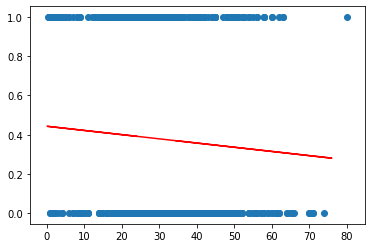

In [77]:
y_pred1 = reg1.predict(X_test1)
plt.plot(X_test1, y_pred1, c='r')
plt.scatter(X_train1,y_train)

En fonction du sexe (il faut tout transférer en valeur numérique).

In [46]:
train['SexNum'] = train['Sex'].replace(['male', 'female'], [0,1])
test['SexNum'] = test['Sex'].replace(['male', 'female'], [0,1])

In [47]:
X_train2 = train['SexNum'].to_numpy()
X_test2 = test['SexNum'].to_numpy()
X_train2 = X_train2.reshape(X_train2.shape[0], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], 1)

In [48]:
reg2 = LinearRegression().fit(X_train2, y_train)

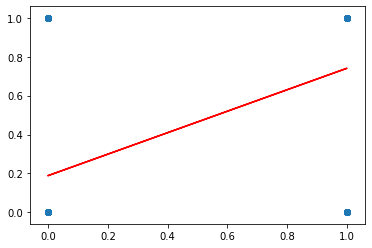

In [76]:
y_pred2 = reg2.predict(X_test2)
plt.plot(X_test2, y_pred2, c='r')
plt.scatter(X_train2,y_train)

En fonction du prix

In [50]:
X_train3 = train['Fare'].to_numpy()
X_test3 = test['Fare'].to_numpy()
X_train3 = X_train3.reshape(X_train3.shape[0], 1)
X_test3 = X_test3.reshape(X_test3.shape[0], 1)

In [51]:
reg3 = LinearRegression().fit(X_train3, y_train)

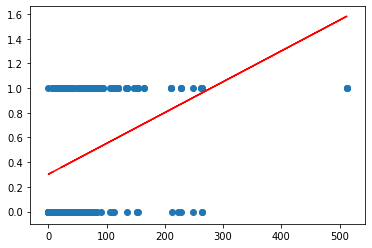

In [75]:
y_pred3 = reg3.predict(X_test3)
plt.plot(X_test3, y_pred3, c='r')
plt.scatter(X_train3,y_train)

En fonction du ticket

In [53]:
X_train4 = train['Pclass'].to_numpy()
X_test4 = test['Pclass'].to_numpy()
X_train4 = X_train4.reshape(X_train4.shape[0], 1)
X_test4 = X_test4.reshape(X_test4.shape[0], 1)

In [55]:
reg4 = LinearRegression().fit(X_train4, y_train)

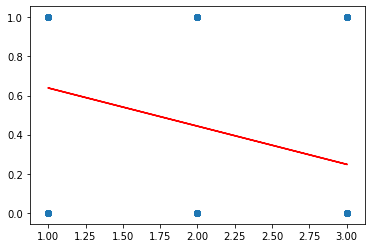

In [74]:
y_pred4 = reg4.predict(X_test4)
plt.plot(X_test4, y_pred4, c='r')
plt.scatter(X_train4,y_train)

## B. En utilisant les variables ensemble

In [59]:
X_train5 = train[['Age', 'SexNum', 'Pclass', 'Fare']].to_numpy()
X_test5 = train[['Age', 'SexNum', 'Pclass', 'Fare']].to_numpy()

In [60]:
reg5 = LinearRegression().fit(X_train5,y_train)

In [71]:
y_pred5 = reg5.predict(X_test5)

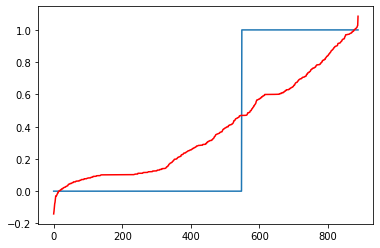

In [72]:
plt.plot(np.sort(y_train, axis=0)) 
plt.plot(np.sort(y_pred5, axis=0), c='r')